In [1]:
import numpy as np
import pandas as pd


Pandas-datareader is a Python package that allows you to access and retrieve financial data from various sources, including Yahoo Finance, Google Finance, Quandl, and FRED. It is a popular tool for financial data analysis and can be used to create charts, backtests, and other financial applications.

In [2]:
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import MinMaxScaler
#to scale the financial data between 0 and 1
#Dataset for Neural Network better to be 0-1 or -1 to 1.

In [4]:
from keras.layers import Dense, Dropout, LSTM
#LSTM - Long Short Term Memory

In [5]:
from keras.models import Sequential

##Getting Financial Data

BTC - Bitcoin,
ETH - Ethereum,
XRP - Ripple

In [9]:
import pandas_datareader.data as web

In [6]:
crypto = 'BTC'

In [7]:
fiat = 'USD'

In [8]:
#Dataset time period
start = dt.datetime(2016,1,1)
#1 Jan'16

end = dt.datetime.now()

**Getting bitcoin dataset from start date to end using YAHOO FINANCE API**

In [10]:
data = web.DataReader(f'{crypto}-{fiat}', 'yahoo', start, end)


TypeError: ignored

##CHANGES IN YAHOO API

Hence using yfinance which gives the same result

In [11]:
import yfinance as yf

data = yf.download(f'{crypto}-{fiat}', start=start, end=end)

print(data.shape)
data.head()

[*********************100%***********************]  1 of 1 completed
(2757, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [12]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756
2023-07-16,30297.472656,30437.560547,30089.669922,30249.132812,30249.132812,8516564470
2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074
2023-07-18,30147.070312,30233.656250,29556.427734,29856.562500,29856.562500,13138897269
2023-07-20,29919.064453,30151.597656,29918.281250,30135.558594,30135.558594,11522117632


*Both blocks of code aim to fetch historical price data for the 'BTC-USD' trading pair from Yahoo Finance, but they use different libraries to achieve this. The first block of code uses pandas_datareader to fetch the data, while the second block uses the yfinance library.*



*In most cases, both approaches will give you similar results since they retrieve data from Yahoo Finance. However, there are some differences to be aware of : Library Usage & Error Handling*

**Both provide the result in a DataFrame**

Getting the data within 0-1

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

*'Close' contains the end of day value*

**2 types**


**prediction days = 10-15 recent**

OR


**prediction days = 70-90**


*prediciton_days > 1 year or so will not align with recent market*

**Then predict the next day**

In [14]:
prediction_days = 60

In [15]:
x_train, y_train = [], []

In [16]:
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days: x, 0])
  y_train.append(scaled_data[x,0])
  #0th column
  #x - chunks of 60 days
  #y - last day

It is going to take previous 59 days then the output (y_train) will be the prediction of 60th days

In [17]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

##Creating the NN

In [19]:
model = Sequential()

**LSTM - Long short term memory, Recurring Layer**


Sequential Data -> Day 1, 2, 3......

Dropout layer - > To prevent Overfitting

In [20]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#first layer with 50 units, which will return sequence and accept input with given shape

In [21]:
model.add(Dropout(0.2))

In [22]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [23]:
model.add(LSTM(units=50))
model.add(Dropout(0.15))

In [24]:
model.add(Dense(units=1))
#Price prediction as the last output

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
85/85 [==============================] - 16s 111ms/step - loss: 0.0067
Epoch 2/25
85/85 [==============================] - 9s 104ms/step - loss: 0.0024
Epoch 3/25
85/85 [==============================] - 9s 104ms/step - loss: 0.0020
Epoch 4/25
85/85 [==============================] - 9s 111ms/step - loss: 0.0019
Epoch 5/25
85/85 [==============================] - 9s 111ms/step - loss: 0.0019
Epoch 6/25
85/85 [==============================] - 8s 97ms/step - loss: 0.0019
Epoch 7/25
85/85 [==============================] - 14s 171ms/step - loss: 0.0014
Epoch 8/25
85/85 [==============================] - 18s 213ms/step - loss: 0.0017
Epoch 9/25
85/85 [==============================] - 12s 141ms/step - loss: 0.0014
Epoch 10/25
85/85 [==============================] - 8s 96ms/step - loss: 0.0013
Epoch 11/25
85/85 [==============================] - 13s 157ms/step - loss: 0.0014
Epoch 12/25
85/85 [==============================] - 18s 207ms/step - loss: 0.0013
Epoch 13/25
85/85 [==

##Testing the Model

In [27]:
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

In [28]:
test_data  = yf.download(f'{crypto}-{fiat}', start=test_start, end=test_end)


[*********************100%***********************]  1 of 1 completed


In [29]:
actual_prices = test_data['Close'].values

In [30]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

testing data in scaler format

In [31]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

In [32]:
model_inputs = model_inputs.reshape(-1,1)

In [33]:
model_inputs = scaler.fit_transform(model_inputs)

In [34]:
x_test = []

In [35]:
for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days: x, 0])


In [36]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [37]:
prediction_prices = model.predict(x_test)

41/41 [==============================] - 2s 28ms/step


*Changing the predicted values back to proper format*

In [40]:
prediction_prices = scaler.inverse_transform(prediction_prices)

**Plotting the Prediction & Actual Prices**

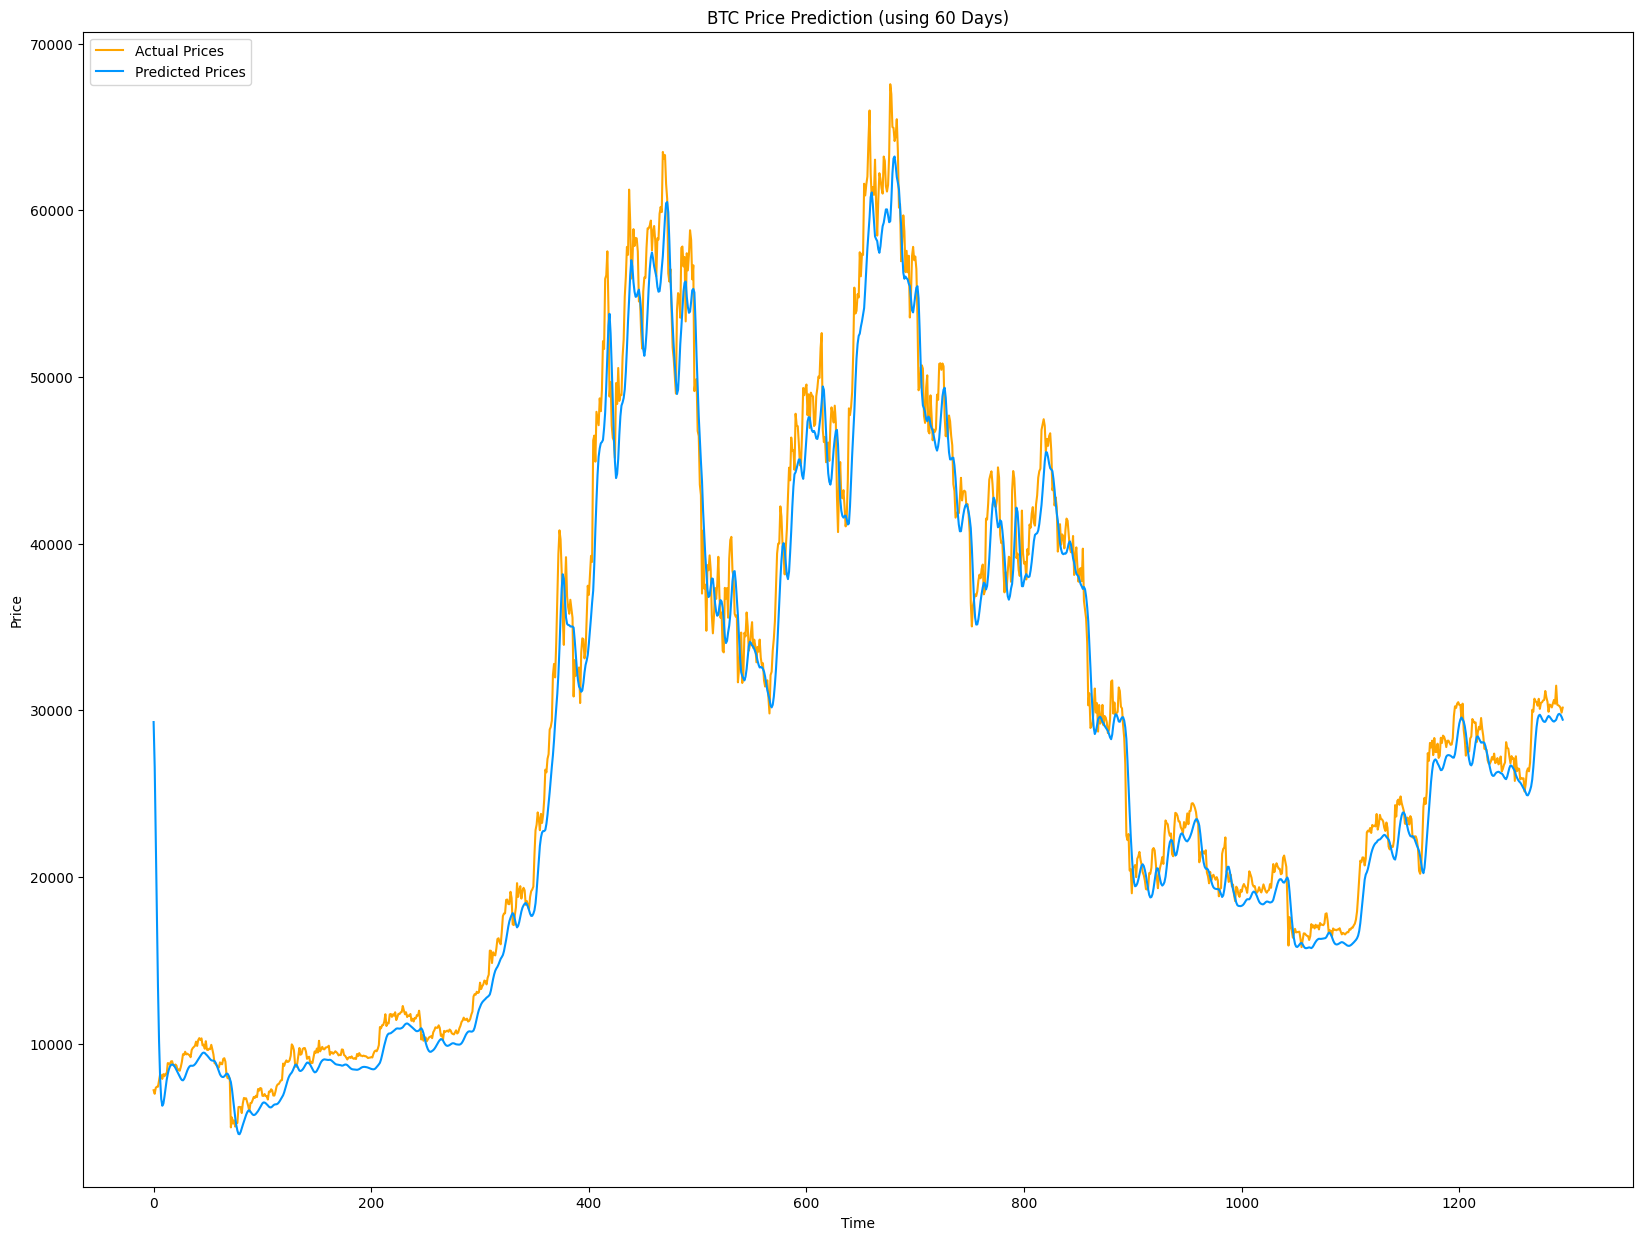

In [48]:
plt.figure(figsize=(20,15))

plt.plot(actual_prices, color='orange', label='Actual Prices')
plt.plot(prediction_prices, color='#0096FF', label='Predicted Prices')

plt.title(f'{crypto} Price Prediction (using {prediction_days} Days)')

plt.xlabel('Time')
plt.ylabel('Price')

plt.legend(loc='upper left')
plt.show()

In [49]:
#saving the model
import pickle


In [50]:
f = 'bt_pridicion_trained_model.pkl'

In [54]:
with open(f,'wb') as x:
  pickle.dump(model, x)

##Prediction For Tomorrow

In [61]:
real_data = [model_inputs[len(model_inputs)+1 - prediction_days: len(model_inputs)+1, 0]]

real_data = np.array(real_data)

In [56]:
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [57]:
prediction = model.predict(real_data)
prediction

1/1 [==============================] - 2s 2s/step


array([[0.38861185]], dtype=float32)

In [58]:
prediction = scaler.inverse_transform(prediction)

In [60]:
print('Price in USD for tomorrow: ', prediction)

Price in USD for tomorrow:  [[29296.352]]


In [66]:
print('Actual Price for today: ',actual_prices[-1])

Actual Price for today:  30159.23046875


In [68]:
print(data.tail(3)['Close'])

Date
2023-07-17    30145.888672
2023-07-18    29856.562500
2023-07-20    30135.558594
Name: Close, dtype: float64


##Predicting the 90th day (+30 day) in future rather than predicting the NEXT DAY

In [69]:
prediction_days = 60

future_day = 30                                                         #CHANGES DONE

x_train_2, y_train_2 = [], []
for x in range(prediction_days, len(scaled_data) - future_day):         #CHANGES DONE
  x_train_2.append(scaled_data[x-prediction_days: x, 0])
  y_train_2.append(scaled_data[x+future_day,0])                         #CHANGES DONE

In [70]:
x_train_2, y_train_2 = np.array(x_train_2), np.array(y_train_2)
x_train_2 = np.reshape(x_train_2, (x_train_2.shape[0], x_train_2.shape[1], 1))
model_2 = Sequential()
model_2.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_2.shape[1], 1)))
#first layer with 50 units, which will return sequence and accept input with given shape

model_2.add(Dropout(0.2))
model_2.add(LSTM(units=50, return_sequences=True))
model_2.add(Dropout(0.2))

model_2.add(LSTM(units=50))
model_2.add(Dropout(0.15))

model_2.add(Dense(units=1))
#Price prediction_2 as the last output

model_2.compile(optimizer='adam', loss='mean_squared_error')

In [71]:
model_2.fit(x_train_2, y_train_2, epochs=25, batch_size=32)

Epoch 1/25
84/84 [==============================] - 19s 141ms/step - loss: 0.0136
Epoch 2/25
84/84 [==============================] - 10s 122ms/step - loss: 0.0078
Epoch 3/25
84/84 [==============================] - 8s 99ms/step - loss: 0.0072
Epoch 4/25
84/84 [==============================] - 9s 113ms/step - loss: 0.0067
Epoch 5/25
84/84 [==============================] - 9s 113ms/step - loss: 0.0069
Epoch 6/25
84/84 [==============================] - 9s 103ms/step - loss: 0.0068
Epoch 7/25
84/84 [==============================] - 9s 108ms/step - loss: 0.0063
Epoch 8/25
84/84 [==============================] - 10s 113ms/step - loss: 0.0060
Epoch 9/25
84/84 [==============================] - 10s 114ms/step - loss: 0.0058
Epoch 10/25
84/84 [==============================] - 9s 109ms/step - loss: 0.0060
Epoch 11/25
84/84 [==============================] - 10s 124ms/step - loss: 0.0059
Epoch 12/25
84/84 [==============================] - 12s 139ms/step - loss: 0.0056
Epoch 13/25
84/84 [=

In [72]:
model_2_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

model_2_inputs = model_2_inputs.reshape(-1,1)

model_2_inputs = scaler.fit_transform(model_2_inputs)

In [73]:
prediction_prices_2 = model_2.predict(x_test)
prediction_prices_2 = scaler.inverse_transform(prediction_prices_2)

41/41 [==============================] - 2s 29ms/step


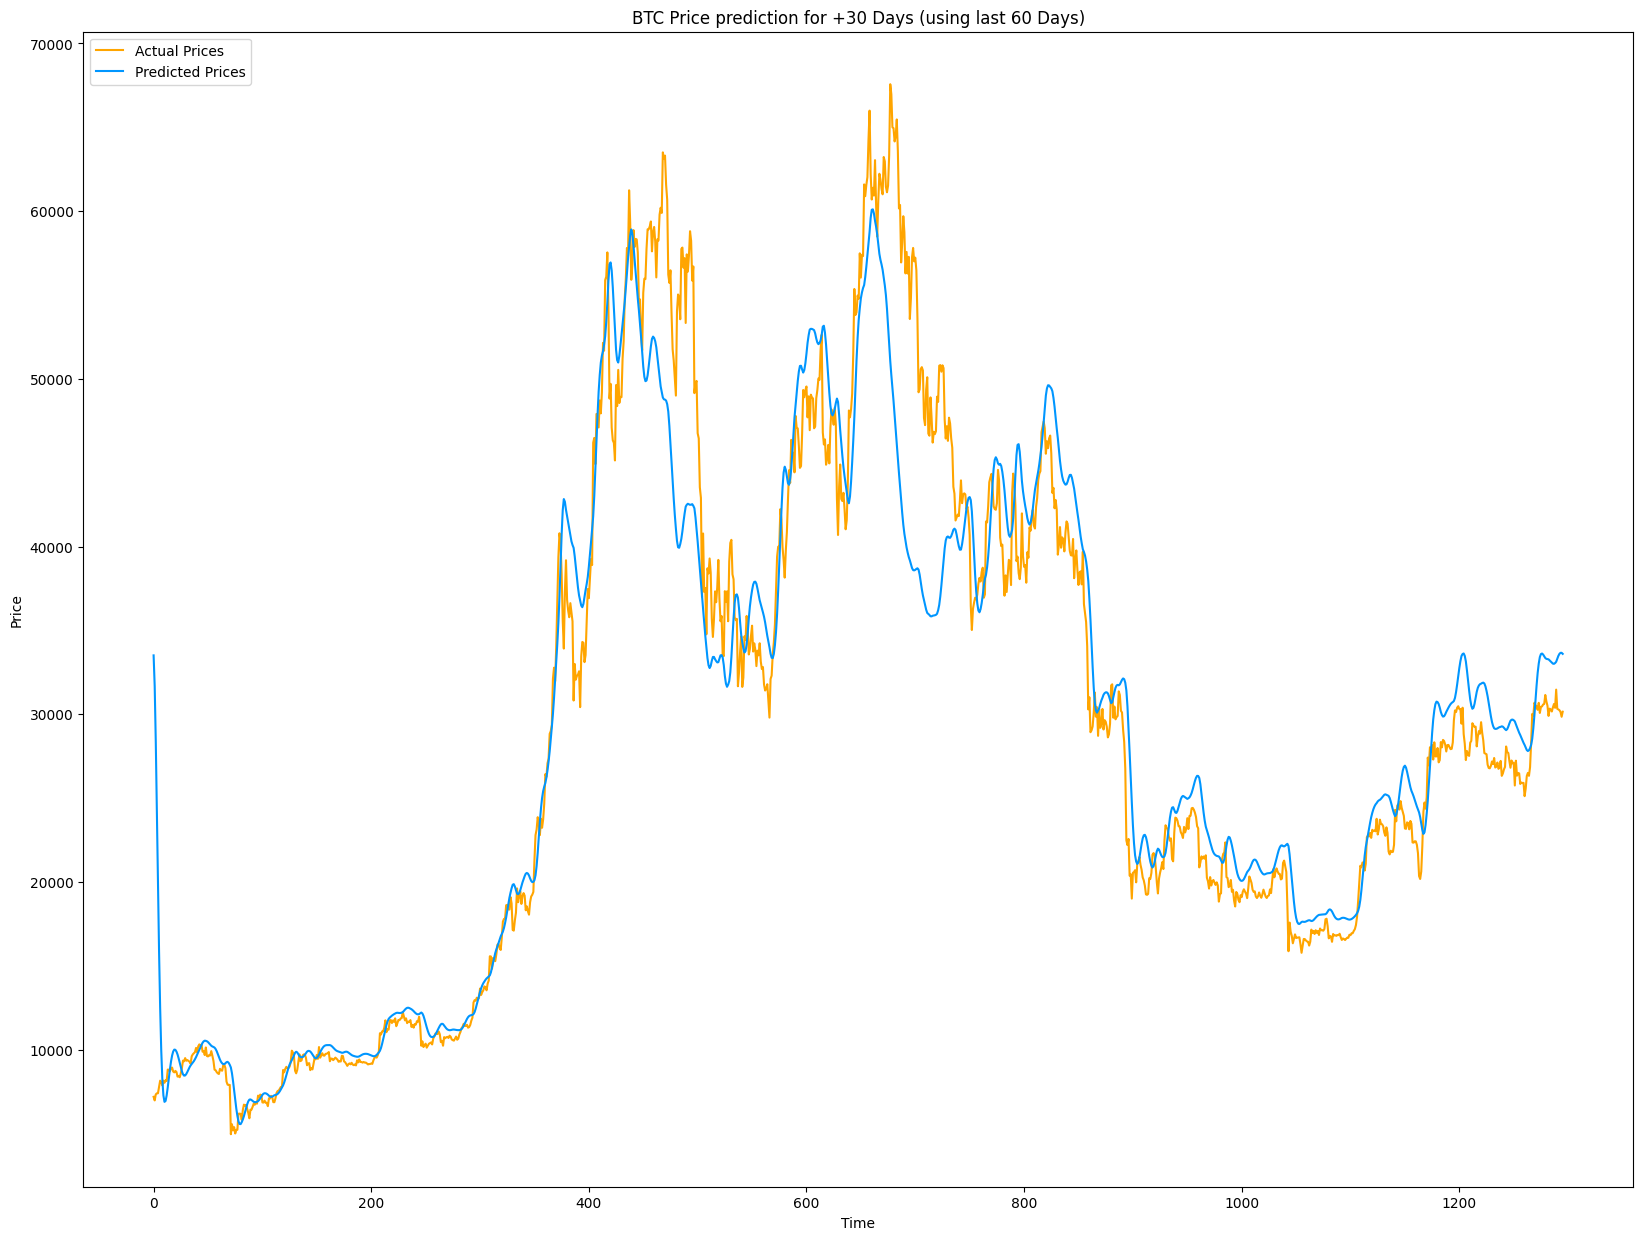

In [74]:
plt.figure(figsize=(20,15))

plt.plot(actual_prices, color='orange', label='Actual Prices')
plt.plot(prediction_prices_2, color='#0096FF', label='Predicted Prices')

plt.title(f'{crypto} Price prediction for +{future_day} Days (using last {prediction_days} Days)')

plt.xlabel('Time')
plt.ylabel('Price')

plt.legend(loc='upper left')
plt.show()

In [75]:
#Saving the model
f = 'bt_predicion_trained_model_2_(30_days).pkl'

with open(f,'wb') as x:
  pickle.dump(model_2, x)

In [79]:
real_data = [model_2_inputs[len(model_2_inputs)+1 - prediction_days: len(model_2_inputs)+1, 0]]

real_data = np.array(real_data)

real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))


prediction_2 = model_2.predict(real_data)
prediction_2

prediction_2 = scaler.inverse_transform(prediction_2)


print(f'\n\nPrice in USD for +{future_day}: ', prediction_2)


print('Actual Price for today: ',actual_prices[-1], '\n\n')



print(data.tail(3)['Close'])


1/1 [==============================] - 0s 55ms/step


Price in USD for +30:  [[33523.504]]
Actual Price for today:  30159.23046875 


Date
2023-07-17    30145.888672
2023-07-18    29856.562500
2023-07-20    30135.558594
Name: Close, dtype: float64
